In [22]:
import pandas as pd

In [23]:
from sklearn import datasets

dataset = datasets.load_iris()


In [24]:
data = pd.DataFrame(dataset.data)

In [25]:
data.columns = dataset.feature_names

In [26]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
## Standardization
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

In [28]:
X_scaled = standard.fit_transform(data)

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(X_scaled)


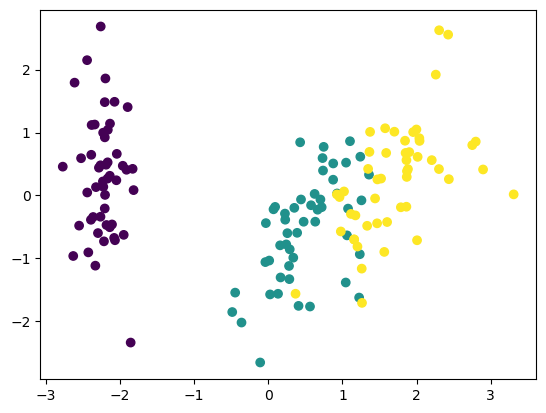

In [31]:
## Visualize
import matplotlib.pyplot as plt
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=dataset.target)

Text(0, 0.5, 'Eculedian Distance')

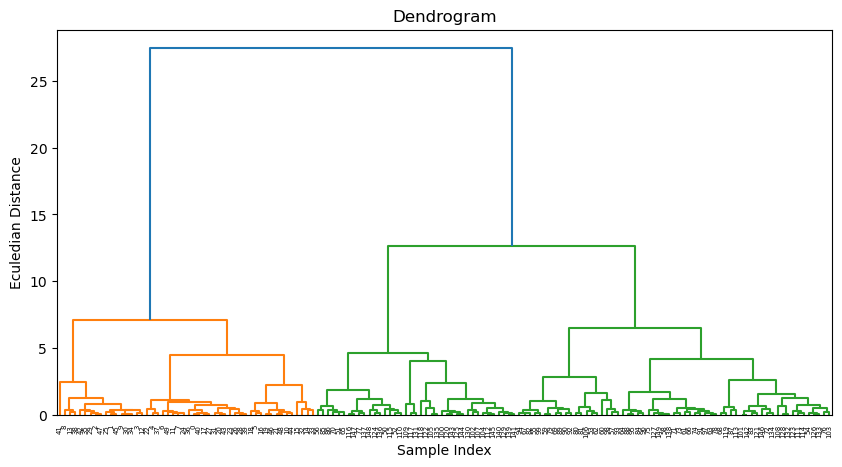

In [33]:
## Dendrogram
import scipy.cluster.hierarchy as sc

plt.figure(figsize=(10,5))
plt.title("Dendrogram")
sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.xlabel("Sample Index")
plt.ylabel("Eculedian Distance")


In [37]:
## Algomurative clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

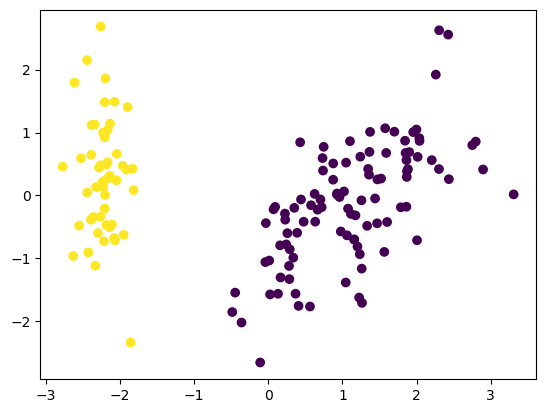

In [ ]:
## Visualize
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=cluster.labels_)